In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from pandas import datetime

In [2]:


quaters = pd.read_csv('quatersales.csv', parse_dates=['Quarter'])

In [3]:
quaters2=quaters.copy()

In [3]:
quaters.Quarter[1]

Timestamp('2014-07-01 00:00:00')

In [10]:
quaters.dtypes

Time Period                  int64
Quarter             datetime64[ns]
Total Sales ($m)           float64
dtype: object

In [9]:
k=quaters.select['Quarter','Total Sales($m)']

TypeError: 'method' object is not subscriptable

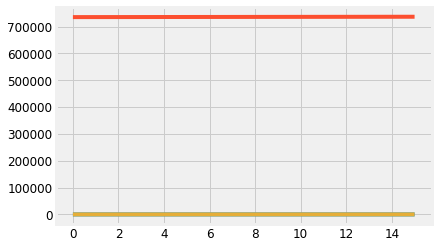

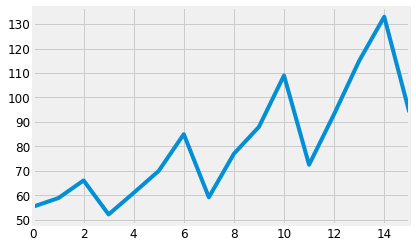

In [7]:
quaters['Total Sales ($m)'].plot()

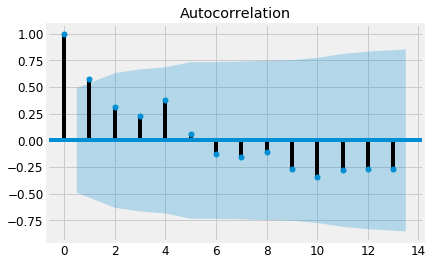

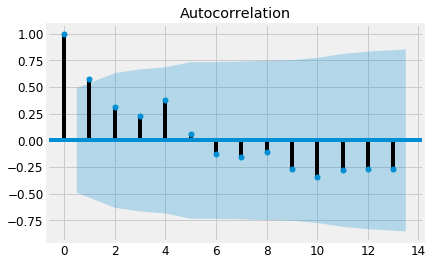

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(quaters['Total Sales ($m)'])

In [7]:
quaters['Total Sales ($m)'].shift(1)

0       NaN
1      55.4
2      58.9
3      66.1
4      52.2
5      61.0
6      70.0
7      85.0
8      59.2
9      77.0
10     88.0
11    109.0
12     72.5
13     93.2
14    115.0
15    133.0
Name: Total Sales ($m), dtype: float64

In [8]:
TotalSales=quaters['Total Sales ($m)']

In [9]:

TotalSales.index

RangeIndex(start=0, stop=16, step=1)

In [14]:
sales_diff = TotalSales.diff(periods=1)

In [15]:
sales_diff = sales_diff[1:]
sales_diff.head()

1     3.5
2     7.2
3   -13.9
4     8.8
5     9.0
Name: Total Sales ($m), dtype: float64

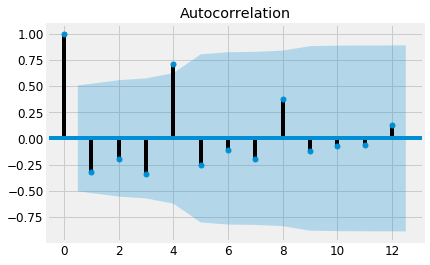

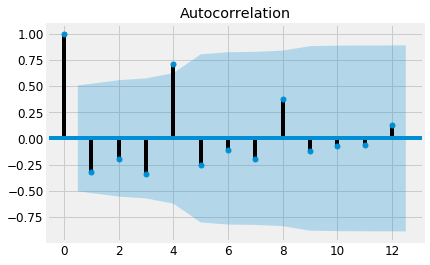

In [16]:
plot_acf(sales_diff)

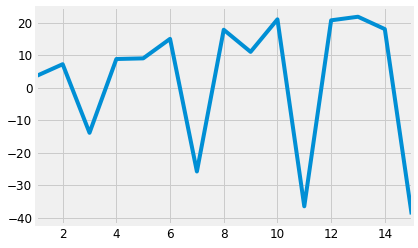

In [17]:
sales_diff.plot()

In [11]:

quaters=quaters.set_index('Quarter')

In [15]:
Quarters=quaters.select_dtypes(exclude=['int64'])

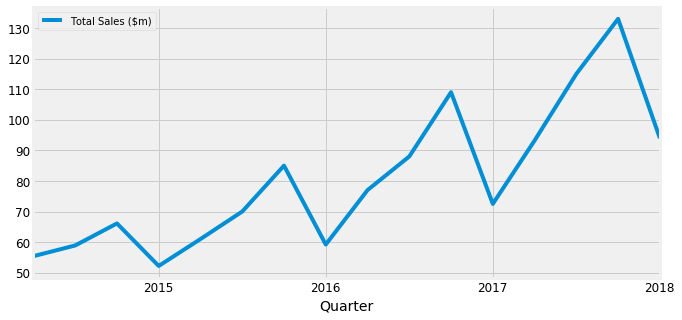

In [18]:
Quarters.plot(figsize=(10,5))
plt.plot(Quarters)

In [19]:
y=quaters['Total Sales ($m)'].resample('Q').mean()

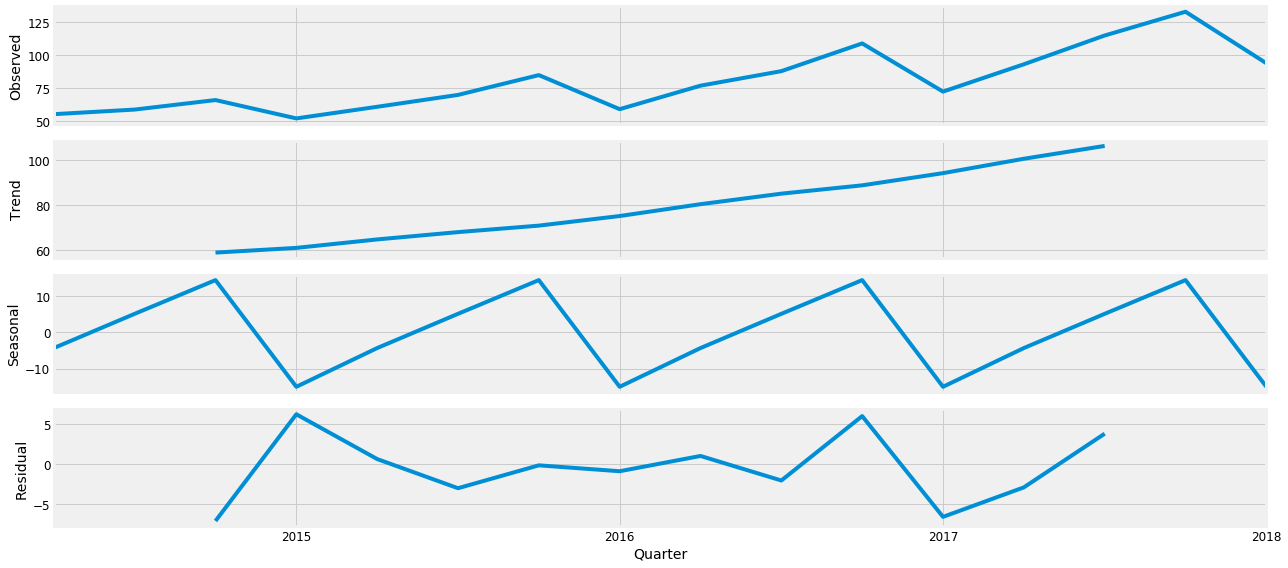

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

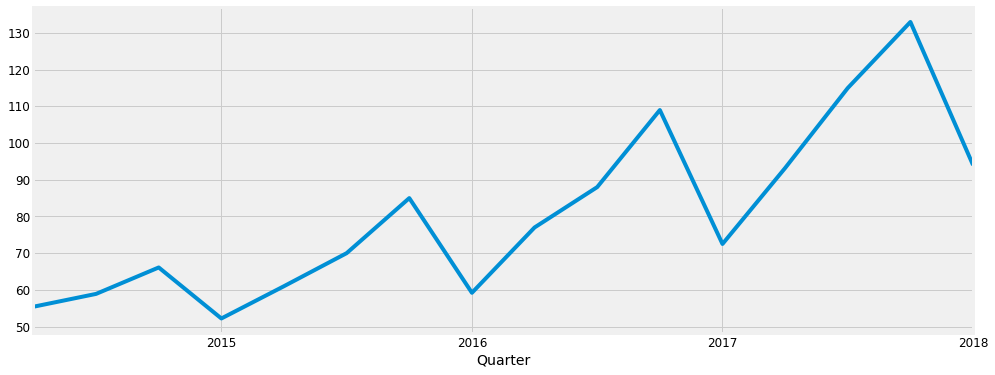

In [22]:
y.plot(figsize=(15, 6))
plt.show()

In [45]:
x=TotalSales.values
train = x[0:12]
test = x[12:17]
predictions = []


In [46]:
test.size

4

In [52]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [53]:
predictions = model_ar_fit.predict(start=12,end=17)

In [47]:
test

array([ 93.2, 115. , 133. ,  94. ])

In [54]:
predictions

array([ 99.67597334, 111.52120036, 144.24744593,  89.00243303,
       131.15604555, 142.83877999])

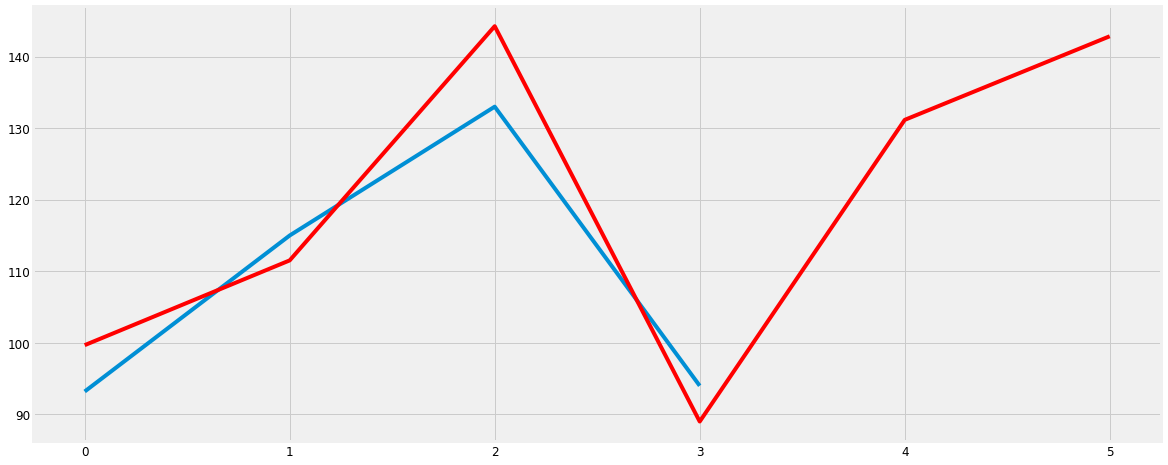

In [55]:
plt.plot(test)
plt.plot(predictions,color='red')

In [94]:
X=datetime.datetime[quaters]

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [177]:

pred = predictions.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)

AttributeError: 'numpy.ndarray' object has no attribute 'get_prediction'

In [164]:
from statsmodels.tsa.arima_model import ARIMA
model_arima = ARIMA(train,order=(0, 1, 1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

93.5890476829278


In [165]:
predictions= model_arima_fit.forecast(steps=5)[0]
predictions

array([ 93.73461322,  96.97202552, 100.20943783, 103.44685014,
       106.68426244])

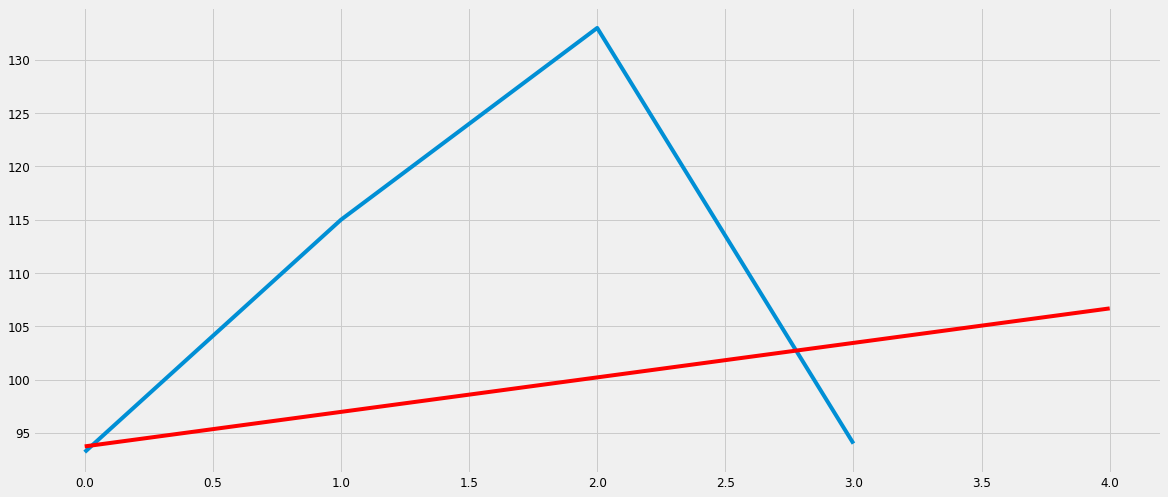

In [166]:
plt.plot(test)
plt.plot(predictions,color='red')

In [124]:
pred = predictions.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
#pred_ci = pred.conf_int()

#ax = y['2014':].plot(label='observed')
#pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

#ax.fill_between(pred_ci.index,
                #pred_ci.iloc[:, 0],
                #pred_ci.iloc[:, 1], color='k', alpha=.2)

#ax.set_xlabel('Date')
#ax.set_ylabel('Furniture Sales')
#plt.legend()

#plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'get_prediction'

In [122]:
mean_squared_error(test,predictions)

372.43940497321046

In [105]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [106]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 104.20868855390603
(0, 0, 1) 104.74250628501969
(0, 0, 2) 104.20430660793994
(0, 0, 3) 104.4504990984668
(0, 0, 4) 105.69374051719703
(0, 1, 0) 98.57682310305779
(0, 1, 1) 93.5890476829278
(0, 1, 2) nan
(0, 1, 4) nan
(0, 2, 0) 99.05891823169904
(0, 2, 1) 95.1313099797927
(0, 2, 2) nan
(1, 0, 0) 104.45385723038083
(1, 0, 1) 108.20849986875585
(1, 0, 3) 106.05779059307164
(1, 1, 0) 98.09141384710523
(1, 1, 1) 94.92377695623301
(1, 2, 0) 97.72987189413799
(2, 0, 0) 106.45026194739239
(2, 1, 0) 98.99174643050907
(2, 1, 1) 95.71033025297658
(2, 2, 0) 99.60802638380807
(3, 0, 0) 108.43787994545026


In [4]:
from fbprophet import Prophet
quater = quaters2.rename(columns={'Quarter': 'ds', 'Total Sales ($m)': 'y'})
quaters_model = Prophet(interval_width=0.95)
quaters_model.add_seasonality(name='quaterly', period=91.31, fourier_order=5)
quaters_model.fit(quater)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.


In [41]:
quaters_future = quaters_model.make_future_dataframe(periods=8, freq='QS')
forecast = quaters_model.predict(quaters_future)


<Figure size 1296x432 with 0 Axes>

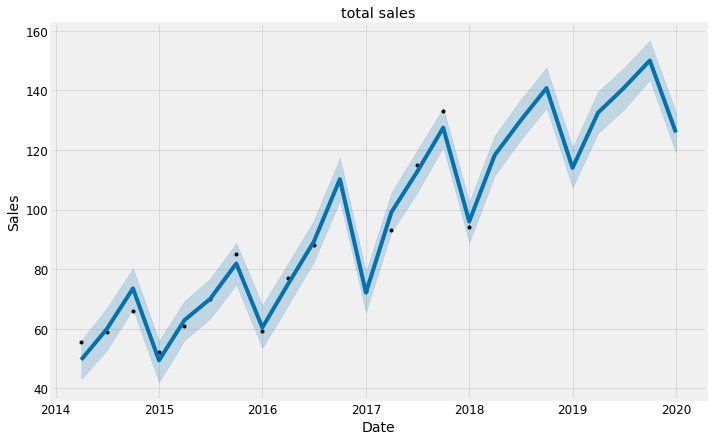

In [40]:
plt.figure(figsize=(18, 6))
quaters_model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('total sales');

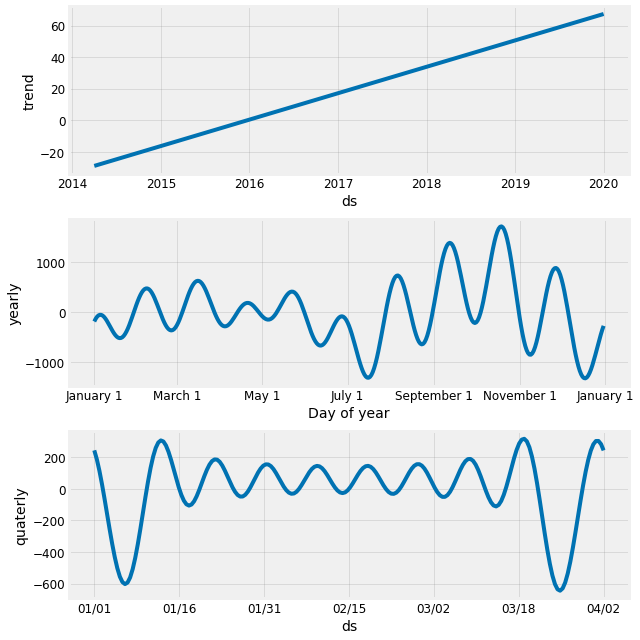

In [36]:
f= quaters_model.plot_components(forecast)